# Exercise 2.4 (2 points)
In this exercise you will implement PCA on the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) data set. 

1. Perform the calculations as you did for the toy data set in exercise 2.3, until you arrive at the encoding matrix. 
In order for you to get some experience with PyTorch, you are required to do this using PyTorch matrix operations. You are not allowed to use libraries such as scikit-learn for this. 

2. Reduce the dimensionality of the data set to 2. Plot the result and describe whether 2 dimensions catch enough of the variance. Do so again for 3 dimensions. What did change?

3. For a dimensionality of your choice, perform the reduction again. Motivate your choice of dimensionality.

Write your answers to the questions in text blocks. 

If you want to have a quick start with Pytorch, use [Google Colab](https://colab.research.google.com/). Colab allows you to use either your local runtime and even your GPU, or you can just do everything online.

In [2]:
import numpy as np
from torchvision.datasets import CIFAR10
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Download the dataset and save it to a local folder. You should use the train set.
cifar_10 = CIFAR10(root="data/", download=True, train=True)

# Create two variables that contain the labels and the image tensors.
X, Y = cifar_10.data, cifar_10.targets
X=X[0:5000]
Y=Y[0:5000]
print(X.shape)

# Flatten the train data such that each image is represented as a 1D vector.
# The size of the vector is 32 x 32 x 3 = 3072
X_flat = X.reshape(-1, 3072)
print(X_flat.shape)

# Center the data by subtracting the mean from each row
M = np.mean(X_flat,axis=0)
X_flat = X_flat - M

# We suggest to use a pandas data frame to store the data, but you can deviate 
# from this if some other package suits you better.
col_names = ["feature_" + str(i) for i in range(X_flat.shape[1])]
df_cifar_10 = pd.DataFrame(X_flat, columns=col_names)
df_cifar_10['target'] = Y

print(df_cifar_10.head())
df_cifar_10.shape


Extracting data/cifar-10-python.tar.gz to data/
(5000, 32, 32, 3)
(5000, 3072)
   feature_0  feature_1  feature_2  ...  feature_3070  feature_3071  target
0   -72.4542   -74.3766    -69.681  ...       -34.203      -42.7262       6
1    22.5458    40.6234     54.319  ...         6.797       29.2738       9
2   123.5458   118.6234    122.319  ...       -40.203      -30.7262       9
3  -103.4542  -111.3766   -122.681  ...       -61.203      -68.7262       4
4    38.5458    43.6234     65.319  ...       -49.203      -34.7262       1

[5 rows x 3073 columns]


(5000, 3073)

In [9]:
# 1. Now, do the calculations in PyTorch step-by-step:
# Load the data into a PyTorch tensor 
import torch

tensor_x = X_flat
torch_tensor_x = torch.from_numpy(tensor_x)
torch_tensor_x.shape


# Compare https://pytorch.org/docs/stable/generated/torch.from_numpy.html

torch.Size([5000, 3072])

In [10]:
# Calculate the covariance matrix
# Compare https://pytorch.org/docs/stable/generated/torch.matmul.html

# tprch.dot() = give 2D Tensor and we need 1D = so using torch.matmul
torch_tensor_x_transpose = torch_tensor_x.T
cov_Cx = torch.matmul(torch_tensor_x_transpose,torch_tensor_x)
#cov_Cx = ((torch_tensor_x).dot(torch_tensor_x_transpose))
print(cov_Cx.size())






torch.Size([3072, 3072])


In [11]:
# Let PyTorch do the eigendecomposition
# Compare https://pytorch.org/docs/stable/generated/torch.eig.html



eigenval, eigenvec = torch.eig(cov_Cx, eigenvectors=True)
eigenval = torch.narrow(eigenval, 1,0,1)
sorted_eigenval, indices = torch.sort(eigenval, 0, descending=True)
print(indices)



tensor([[   0],
        [   1],
        [   2],
        ...,
        [2528],
        [2603],
        [2602]])


torch.Size([2, 5000])
tensor(40.4395, dtype=torch.float64)


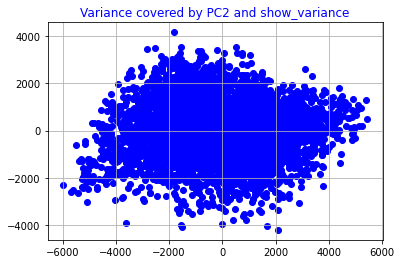

torch.Size([3, 5000])
tensor(47.0754, dtype=torch.float64)


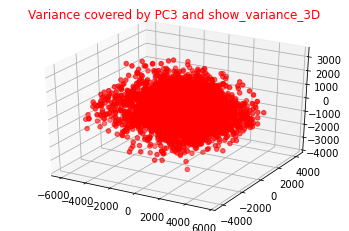

In [ ]:
# 2.
# Reduce the dimensionality of the data set to 2. Plot the result and describe 
# whether 2 dimensions catch enough of the variance. 

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
 # principal component = PC

PC2= eigenvec[:,:2]
reduced_2D= torch.matmul(PC2.T, torch_tensor_x_transpose)
print(reduced_2D.shape)

plt.scatter(reduced_2D[0], reduced_2D[1], color= "b")

show_variance = (torch.sum(eigenval[0:2]))/torch.sum(eigenval)*100
print(show_variance)
plt.title("Variance covered by PC2 and show_variance", color= "b")
plt.grid()
plt.show()

### Answers : In 2 Dimension , PC2 = covers 40.4395% variance only



# Do so again for 3 dimensions. What did change?
# (Here's a tutorial on how to plot in 3 dimensions with pyplot:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725)

PC3= eigenvec[:,:3]
reduced_3D= torch.matmul(PC3.T, torch_tensor_x_transpose)
print(reduced_3D.shape)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(reduced_3D[0], reduced_3D[1],reduced_3D[2], color= "r")
show_variance_3D = (torch.sum(eigenval[0:3]))/torch.sum(eigenval)*100
print(show_variance_3D)
plt.title("Variance covered by PC3 and show_variance_3D", color= "r")
plt.show()




# What do you observe?


### Answers : IN 3 Dimension = 47.0754% variance is covered which is more than covered in 2D 

In [18]:
# 3.
# For a dimensionality of your choice, perform the reduction again. 
# Motivate your choice of dimensionality.


## check how many dimentsion can represent your 95% data

explained_variance= list()
for i in range(len(eigenval)):
 explained_variance.append((eigenval[i]/sum(eigenval)).item())

explained_variance = sorted(explained_variance,reverse= True)
S=0
print("Rank at tvariance, t at tvariance at Rank")
for i, variance in enumerate(explained_variance):
 S+= variance
 print("{}\t{}\t{}".format(i, variance, S))
 if S >= 0.95:
   break


### wuth the reusle, you see = with 202 dimension, we can represned 95% of our original data 

Rank at tvariance, t at tvariance at Rank
0	0.29194361665830687	0.29194361665830687
1	0.11245143144356202	0.4043950481018689
2	0.06635922624547122	0.4707542743473401
3	0.037136478897319414	0.5078907532446595
4	0.03544328855562439	0.5433340418002839
5	0.02880064943807992	0.5721346912383638
6	0.02650439299344408	0.5986390842318079
7	0.02191009378750647	0.6205491780193144
8	0.021092558422722375	0.6416417364420368
9	0.014533349638918832	0.6561750860809556
10	0.013472048030647867	0.6696471341116035
11	0.010542434397209581	0.6801895685088131
12	0.010491482024839295	0.6906810505336524
13	0.010106248733025899	0.7007872992666783
14	0.009058684492009493	0.7098459837586878
15	0.008537898076183425	0.7183838818348712
16	0.0075381697099566125	0.7259220515448278
17	0.007055032873968755	0.7329770844187966
18	0.006713667378706032	0.7396907517975027
19	0.006558289996020739	0.7462490417935234
20	0.006184086014913774	0.7524331278084372
21	0.00579233340647798	0.7582254612149152
22	0.005057269211343089	0.76